In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('boston.csv')
print(" Размерность датасета ")
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")
print(" Типы данных столбцов ")
df.dtypes
print(" Информация (info) ")
df.info()
print(" Информация (describe) ")
df.describe()

 Размерность датасета 
Количество строк: 506
Количество столбцов: 14
 Типы данных столбцов 
 Информация (info) 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
 Информация (describe) 


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [28]:
print("\n Проверка на пропущенные значения ")
print(df.isnull().sum())
print("\n Проверка на дубликаты ")
duplicates = df.duplicated().sum()
print(f"Количество дублирующихся строк: {duplicates}")
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(" Проверка на нулевые значения ")
(df == 0).sum()



 Проверка на пропущенные значения 
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

 Проверка на дубликаты 
Количество дублирующихся строк: 0
 Проверка на нулевые значения 


,0
CRIM,0
ZN,372
INDUS,0
CHAS,471
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [29]:
mean_medv = df['MEDV'].mean()
print(f"1. Средняя стоимость жилья: {mean_medv:.2f} тыс. долларов")
min_medv = df['MEDV'].min()
max_medv = df['MEDV'].max()
print(f"2. Минимальная стоимость жилья: {min_medv:.2f} тыс. долларов")
print(f"3. Максимальная стоимость жилья: {max_medv:.2f} тыс. долларов")
median_rm = df['RM'].median()
print(f"4. Медианное количество комнат: {median_rm:.2f}")
high_crime_mean = df[df['CRIM'] > df['CRIM'].median()]['MEDV'].mean()
low_crime_mean = df[df['CRIM'] <= df['CRIM'].median()]['MEDV'].mean()
print(f"6. Средняя стоимость жилья в районах с высоким уровнем преступности: {high_crime_mean:.2f}")
print(f"7. Средняя стоимость жилья в районах с низким уровнем преступности: {low_crime_mean:.2f}")
distance_corr = df['DIS'].corr(df['MEDV'])
print(f"8. Корреляция между расстоянием до центра и стоимостью: {distance_corr:.3f}")
high_tax_mean = df[df['TAX'] > df['TAX'].median()]['MEDV'].mean()
low_tax_mean = df[df['TAX'] <= df['TAX'].median()]['MEDV'].mean()
print(f"9. Средняя стоимость жилья в районах с высоким налогом: {high_tax_mean:.2f}")
print(f"10.Средняя стоимость жилья в районах с низким налогом: {low_tax_mean:.2f}")

1. Средняя стоимость жилья: 22.53 тыс. долларов
2. Минимальная стоимость жилья: 5.00 тыс. долларов
3. Максимальная стоимость жилья: 50.00 тыс. долларов
4. Медианное количество комнат: 6.21
6. Средняя стоимость жилья в районах с высоким уровнем преступности: 20.12
7. Средняя стоимость жилья в районах с низким уровнем преступности: 24.95
8. Корреляция между расстоянием до центра и стоимостью: 0.250
9. Средняя стоимость жилья в районах с высоким налогом: 19.00
10.Средняя стоимость жилья в районах с низким налогом: 25.98


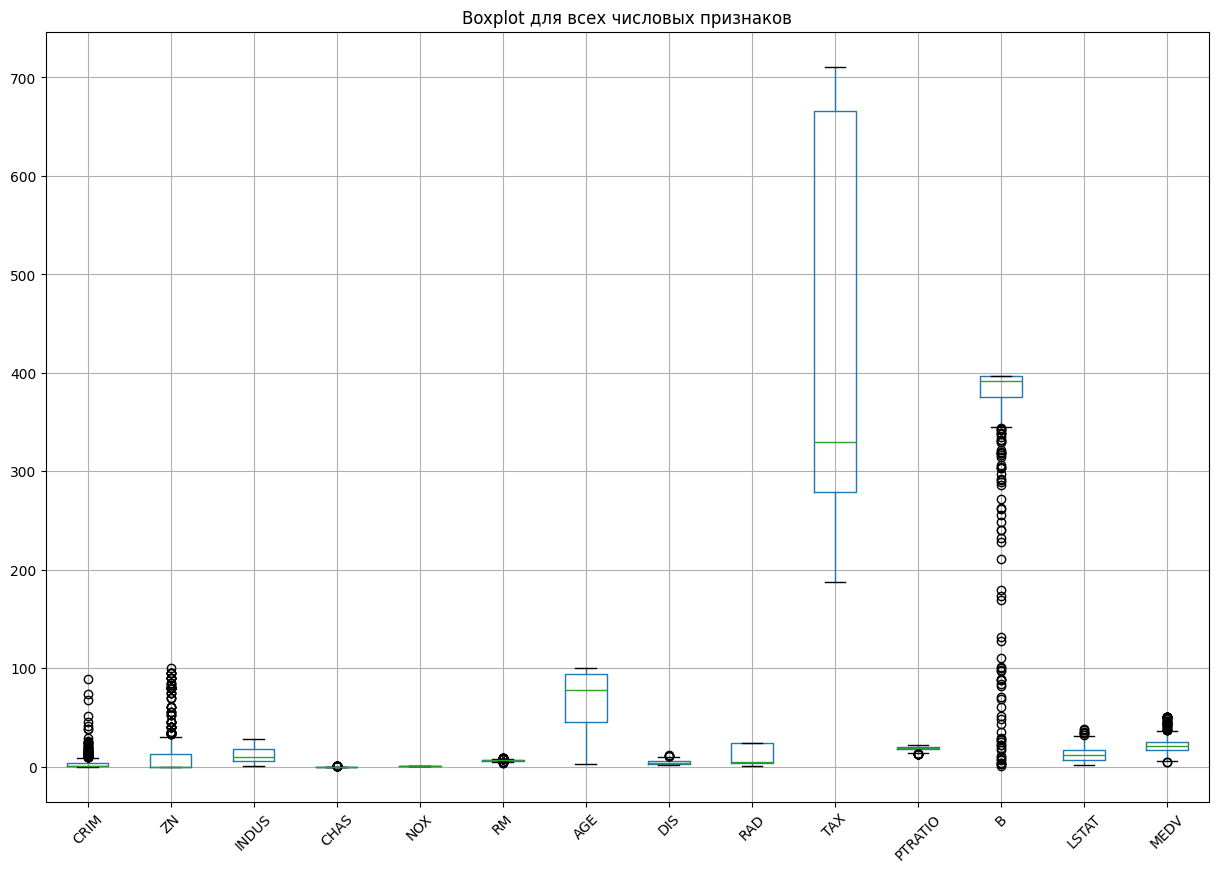

In [30]:
plt.figure(figsize=(15, 10))
df[numeric_columns].boxplot()
plt.title('Boxplot для всех числовых признаков')
plt.xticks(rotation=45)
plt.show()

In [40]:
print(" Поиск выбросов:")
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} выбросов")

 Поиск выбросов:
CRIM: 66 выбросов
ZN: 68 выбросов
INDUS: 0 выбросов
CHAS: 35 выбросов
NOX: 0 выбросов
RM: 30 выбросов
AGE: 0 выбросов
DIS: 5 выбросов
RAD: 0 выбросов
TAX: 0 выбросов
PTRATIO: 15 выбросов
B: 77 выбросов
LSTAT: 7 выбросов
MEDV: 40 выбросов


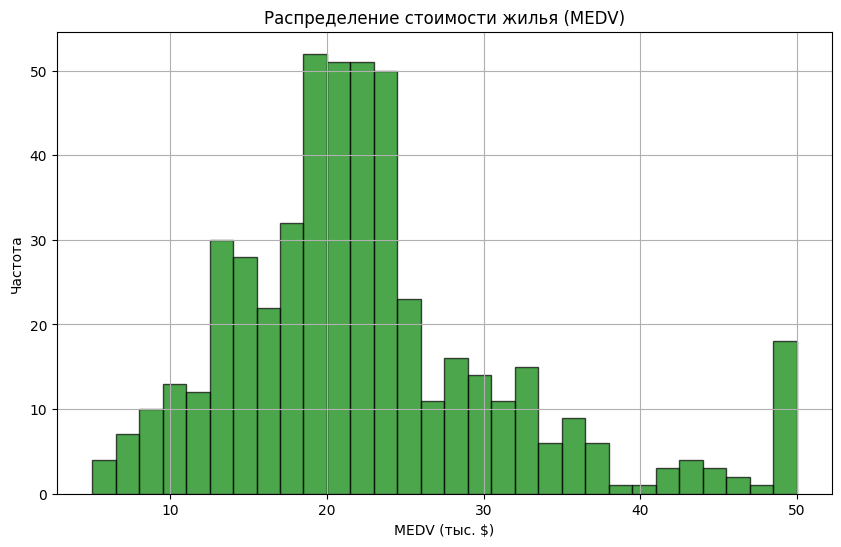

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(df['MEDV'], bins=30, alpha=0.7, color='green', edgecolor='black')
plt.title('Распределение стоимости жилья (MEDV)')
plt.xlabel('MEDV (тыс. $)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

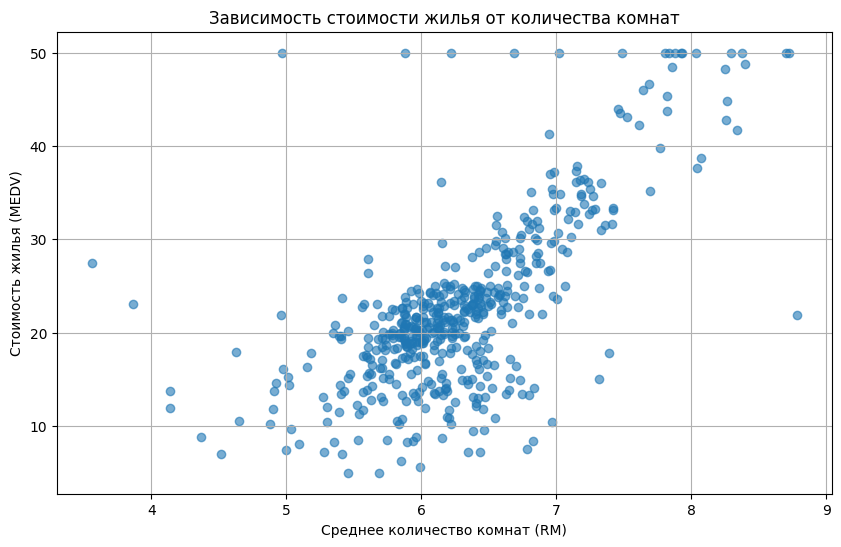

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(df['RM'], df['MEDV'], alpha=0.6)
plt.title('Зависимость стоимости жилья от количества комнат')
plt.xlabel('Среднее количество комнат (RM)')
plt.ylabel('Стоимость жилья (MEDV)')
plt.grid(True)
plt.show()


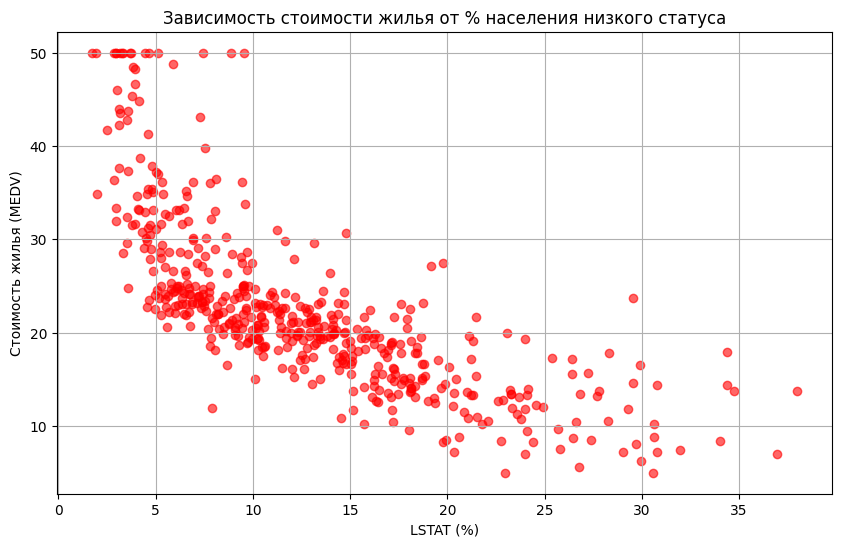

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(df['LSTAT'], df['MEDV'], alpha=0.6, color='red')
plt.title('Зависимость стоимости жилья от % населения низкого статуса')
plt.xlabel('LSTAT (%)')
plt.ylabel('Стоимость жилья (MEDV)')
plt.grid(True)
plt.show()

Корреляция признаков с целевой переменной MEDV:
MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


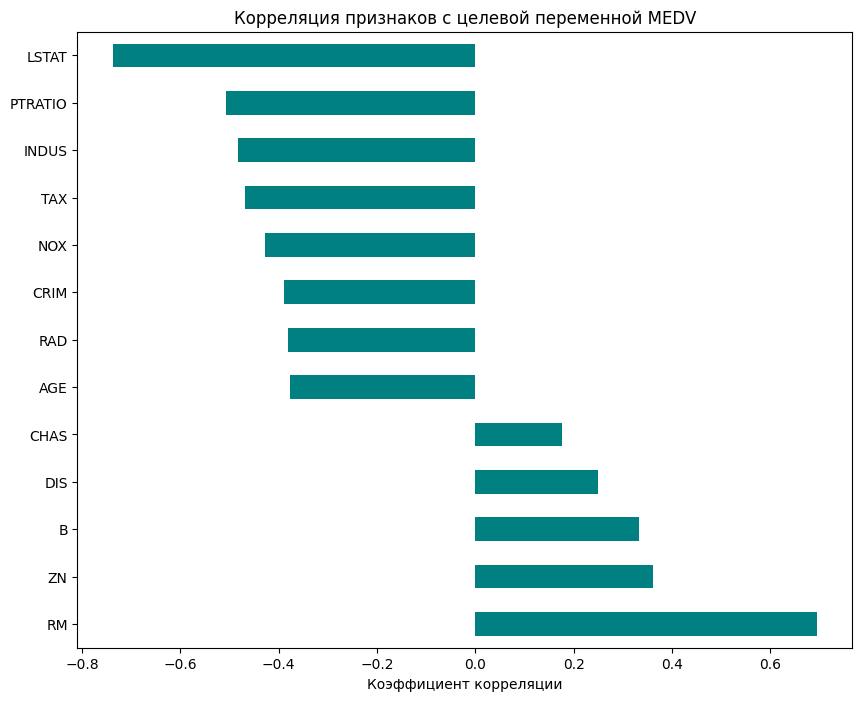

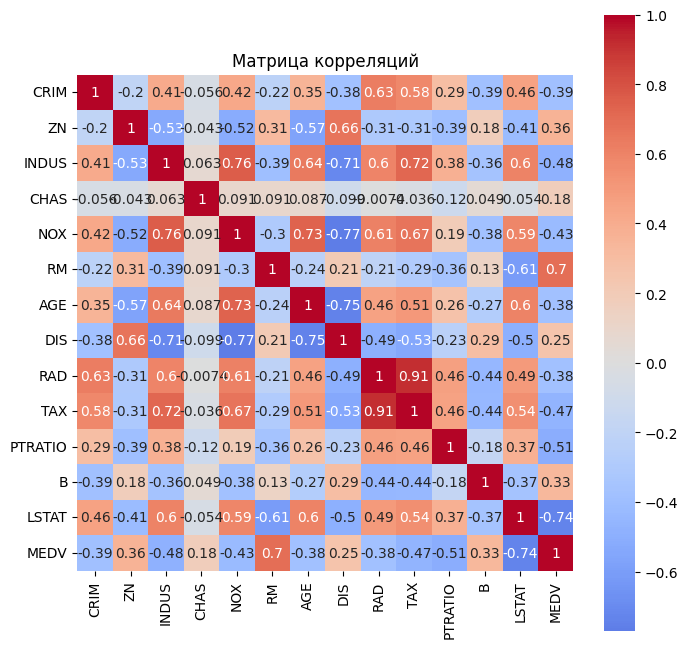

In [41]:
correlation_with_target = df[numeric_columns].corr()['MEDV'].sort_values(ascending=False)
print("Корреляция признаков с целевой переменной MEDV:")
print(correlation_with_target)
plt.figure(figsize=(10, 8))
correlation_with_target.drop('MEDV').plot(kind='barh', color='teal')
plt.title('Корреляция признаков с целевой переменной MEDV')
plt.xlabel('Коэффициент корреляции')
plt.show()
plt.figure(figsize=(8, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Матрица корреляций')
plt.show()


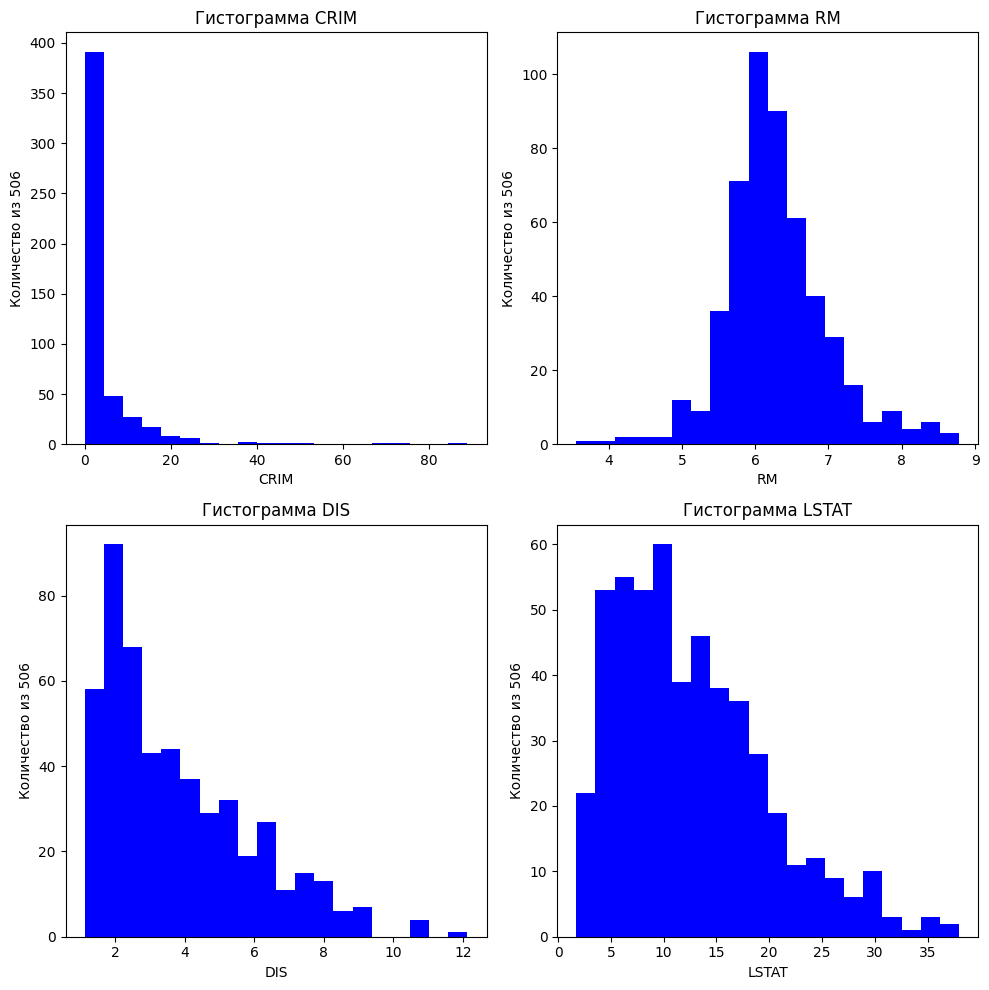

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()
cols_for_hist = ['CRIM', 'RM', 'DIS', 'LSTAT']
for i, col in enumerate(cols_for_hist):
    axes[i].hist(df[col], bins=20, alpha=1, color='blue')
    axes[i].set_title(f'Гистограмма {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Количество из 506')
plt.tight_layout()
plt.show()



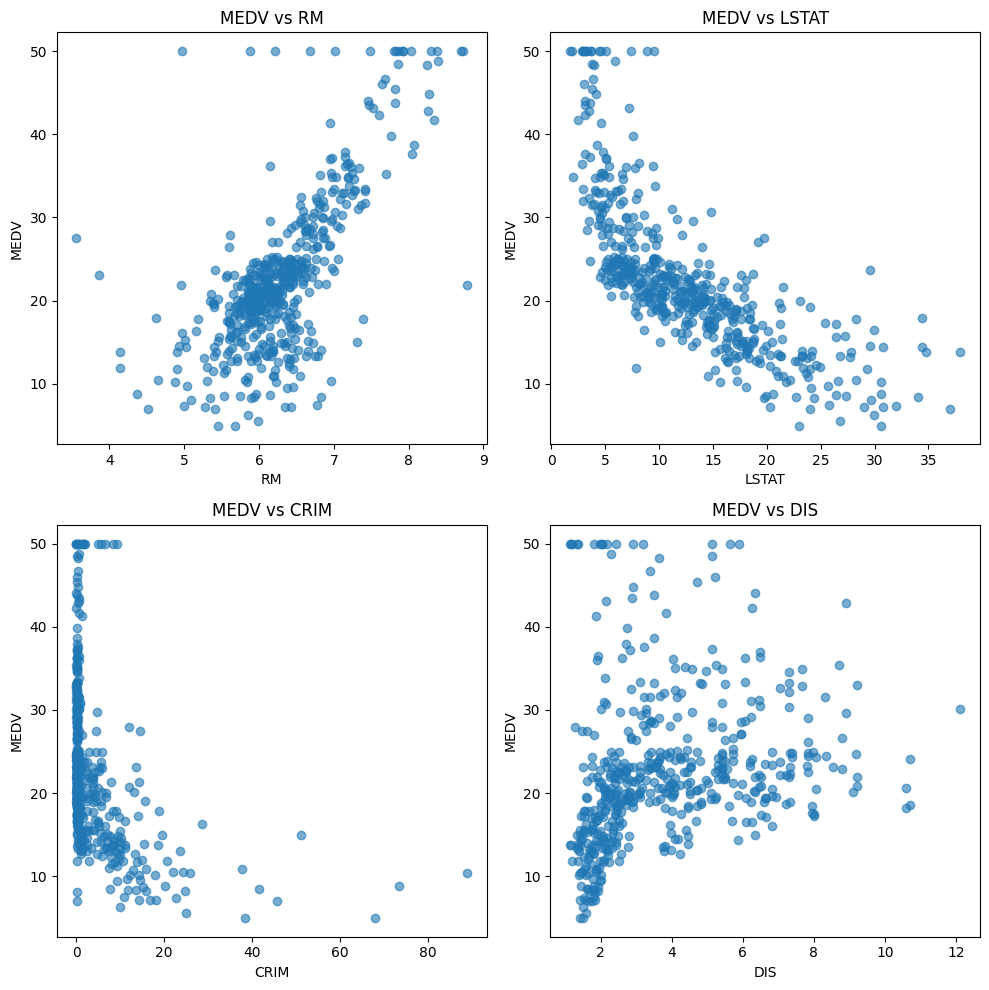

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()

scatter_pairs = [('RM', 'MEDV'), ('LSTAT', 'MEDV'), ('CRIM', 'MEDV'), ('DIS', 'MEDV')]

for i, (x_col, y_col) in enumerate(scatter_pairs):
    axes[i].scatter(df[x_col], df[y_col], alpha=0.6)
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)
    axes[i].set_title(f'{y_col} vs {x_col}')

plt.tight_layout()
plt.show()

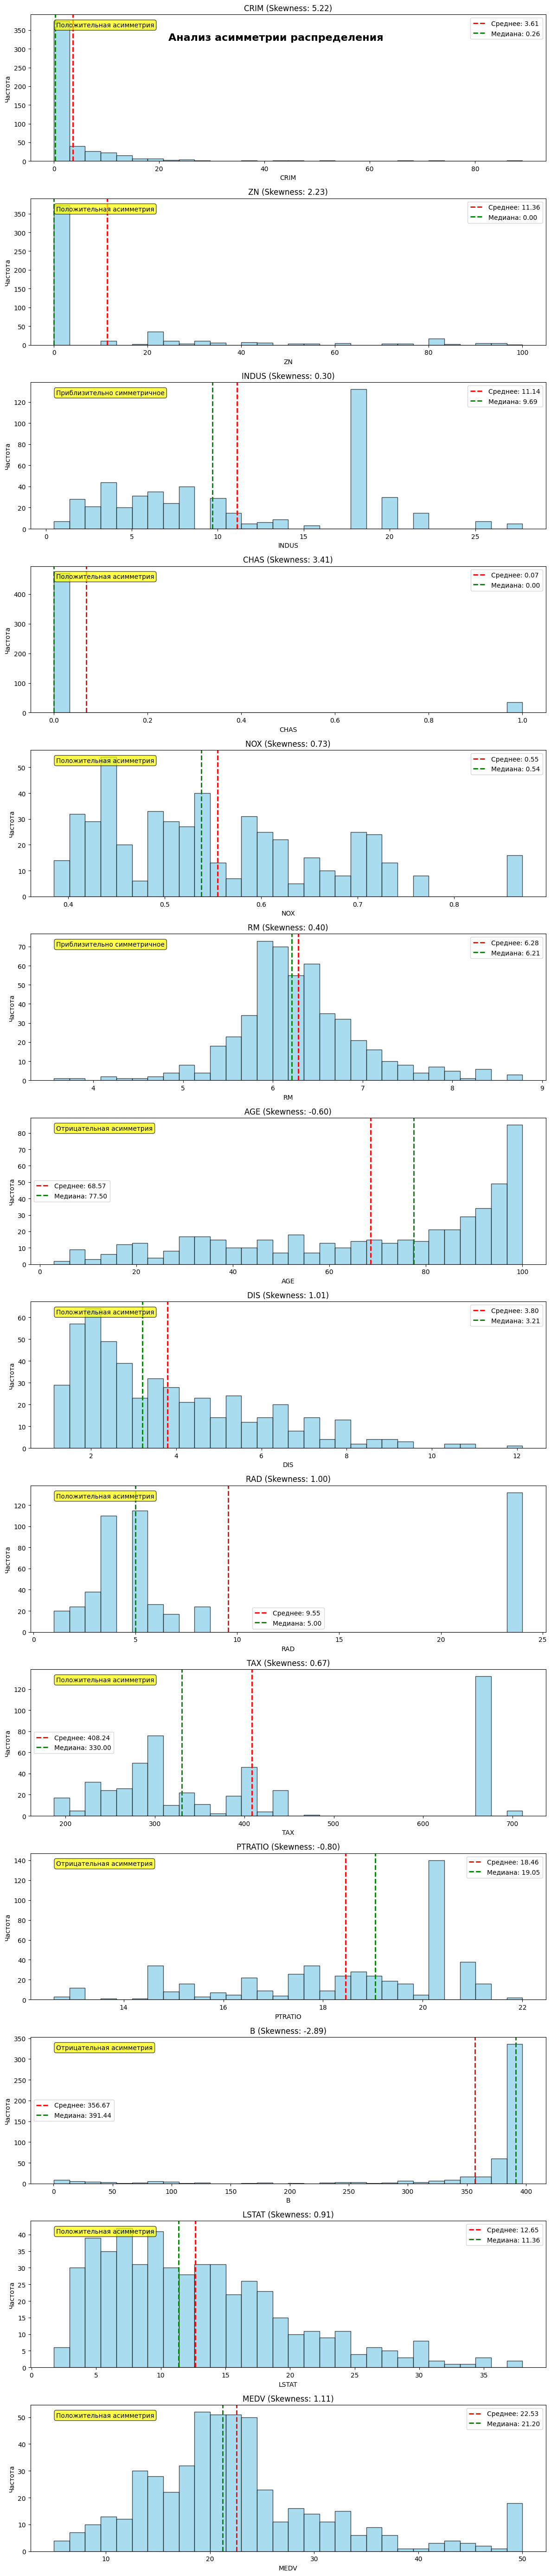

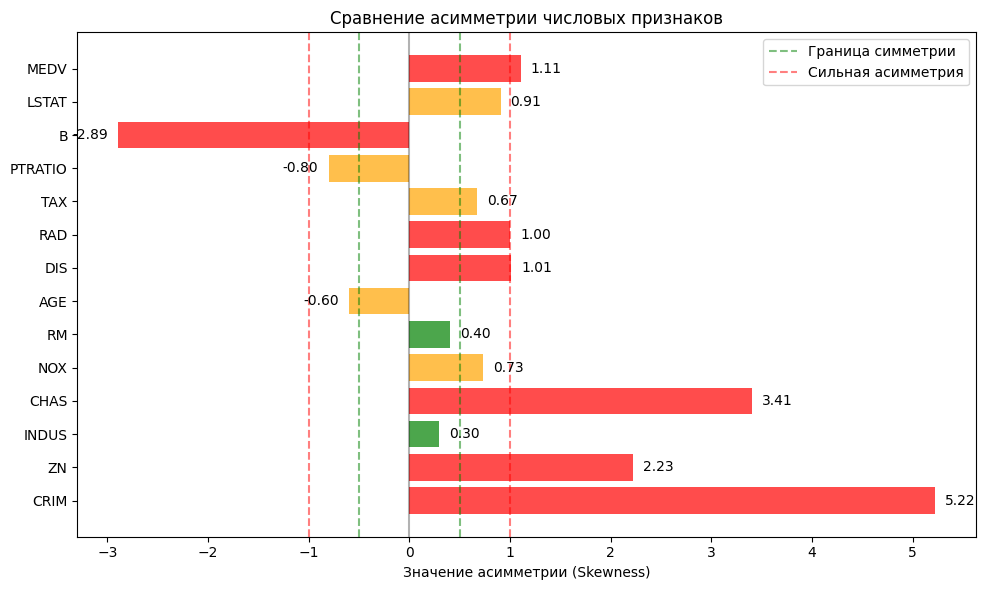

In [42]:
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(12, 4*len(numeric_columns)))
fig.suptitle('Анализ асимметрии распределения', fontsize=16, fontweight='bold')

for i, col in enumerate(numeric_columns):
    skewness = df[col].skew()

    axes[i].hist(df[col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{col} (Skewness: {skewness:.2f})')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')

    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Медиана: {median_val:.2f}')
    axes[i].legend()


    if abs(skewness) < 0.5:
        asymmetry_type = "Приблизительно симметричное"
    elif skewness > 0.5:
        asymmetry_type = "Положительная асимметрия"
    else:
        asymmetry_type = "Отрицательная асимметрия"

    axes[i].text(0.05, 0.95, asymmetry_type, transform=axes[i].transAxes,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
                    verticalalignment='top')

plt.tight_layout()
plt.show()

skewness_values = [df[col].skew() for col in numeric_columns]
colors = ['red' if abs(skew) > 1 else 'orange' if abs(skew) > 0.5 else 'green' for skew in skewness_values]

plt.figure(figsize=(10, 6))
bars = plt.barh(numeric_columns, skewness_values, color=colors, alpha=0.7)
plt.xlabel('Значение асимметрии (Skewness)')
plt.title('Сравнение асимметрии числовых признаков')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.axvline(x=-0.5, color='green', linestyle='--', alpha=0.5, label='Граница симметрии')
plt.axvline(x=0.5, color='green', linestyle='--', alpha=0.5)
plt.axvline(x=-1, color='red', linestyle='--', alpha=0.5, label='Сильная асимметрия')
plt.axvline(x=1, color='red', linestyle='--', alpha=0.5)
plt.legend()

for i, (bar, skew_val) in enumerate(zip(bars, skewness_values)):
    plt.text(bar.get_width() + (0.1 if bar.get_width() >= 0 else -0.1),
             bar.get_y() + bar.get_height()/2,
             f'{skew_val:.2f}',
             ha='left' if bar.get_width() >= 0 else 'right',
             va='center')

plt.tight_layout()
plt.show()